In [ ]:
import numpy as np
import pandas as pd 
import re
from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_excel('/content/data.xlsx')
data.head()


,Text,Summary,cleaned_text,cleaned_summary
0,"Tổng thư ký Tổ chức Hiệp ước Bắc Đại Tây Dương (NATO) Jens Stoltenberg ngày 19/5 cho biết, nếu Ai Cập đề nghị, liên minh này sẽ hỗ trợ công tác tìm kiếm chiếc máy bay mang số hiệu MS 804 của hãng ...",Chiếc Airbus A320 (chuyến bay số hiệu MS804) bay từ thủ đô Paris đến thủ đô Cairo thì biến mất khỏi màn hình radar vào sáng sớm ngày 19.5.Các chuyên gia hàng không lo ngại một hành động cố ý đã kh...,NaN,NaN
1,"Trả lời phỏng vấn, bà Hillary tuyên bố: “Tôi sẽ là ứng viên Tổng thống đại diện cho đảng tôi. Điều đó đã ngã ngũ rồi, không có gì thay đổi được”.Khẳng định của bà Hillary được đưa ra khi bà nắm ưu...","Cựu ngoại trưởng Mỹ Clinton nói rằng Donald Trump là mối đe dọa đến đất nước, nền dân chủ và nền kinh tế nước này.Bà cho rằng ứng viên tổng thống đảng Cộng hòa là người “vô trách nhiệm, bất cẩn và...",NaN,NaN
2,"Lễ tuyên thệ của bà Thái diễn ra trước một lá cờ Đài Loan và chân dung người sáng lập hòn đảo Tôn Dật Tiên.Cơ quan Ngoại giao Đài Loan cho biết gần 700 nguyên thủ quốc gia, các nhà ngoại giao và q...","Bà Thái Anh Văn, Chủ tịch đảng Dân Tiến, đã giành chiến thắng trong cuộc bầu cử người đứng đầu chính quyền Đài Loan.Thách thức lớn nhất đối với bà sẽ là việc giải quyết mối quan hệ nguội lạnh với ...",NaN,NaN
3,"Những quan điểm nêu trên được các chuyên gia chia sẻ tại hội thảo “TP HCM - Khát vọng vươn lên” do báo Tuổi trẻ tổ chức ngày 19/5.Theo PGS. TS Trần Đình Thiên - Viện trưởng Viện kinh tế Việt Nam, ...","Ngày 19-5, tại hội thảo “TP.HCM - Khát vọng vươn lên”, nhiều chuyên gia đã chỉ ra những nguyên nhân cản trở sự vươn lên của TP.HCM, đồng thời đưa ra nhiều giải pháp để TP bứt phá, vươn lên, trở th...",NaN,NaN
4,"Ông Phạm Việt Thắng - Chủ tịch Hội Nghề cá Việt Nam vừa có công văn gửi Văn phòng Chính phủ, Bộ TN&MT, Bộ NN&PTNT, Bộ KH&CN, Bộ Tài chính sáng nay (27-5).Nội dung công văn đề nghị các cơ quan chức...",Hội nghề cá Việt Nam đề nghị Chính phủ và bộ ngành đẩy nhanh tiến độ xác định nguyên nhân cá chết hàng loạt ở các tỉnh Bắc miền Trung.Thời gian công bố nguyên nhân cá chết càng kéo dài thì chất độ...,NaN,NaN


In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english')) 

def text_cleaner(text,num):
    # lower
    newString = text.lower()
    # remove HTML
    newString = BeautifulSoup(newString, "lxml").text
    # Remove any text inside the parenthesis
    newString = re.sub(r'\([^)]*\)', '', newString)
    # remove double quotes
    newString = re.sub('"','', newString)
    # remove 's
    newString = re.sub(r"'s\b","",newString)
    # Eliminate punctuations and special characters
    #newString = re.sub("[^a-zA-Z]", " ", newString)
    # Remove stopwords
    if(num==0):
        tokens = [w for w in newString.split() if not w in stop_words]
    else:
        tokens=newString.split()
    long_words=[]
    # Remove short words
    for i in tokens:
        if len(i)>1:                                                 
            long_words.append(i)   
    return (" ".join(long_words)).strip()

In [ ]:
# Cleaning the "Text" Column

cleaned_text = []
for t in data['Text']:
    cleaned_text.append(text_cleaner(t,0))


In [ ]:
cleaned_text[:2]  

['tổng thư ký tổ chức hiệp ước bắc đại tây dương jens stoltenberg ngày 19/5 cho biết, nếu ai cập đề nghị, liên minh này sẽ hỗ trợ công tác tìm kiếm chiếc máy bay mang số hiệu ms 804 của hãng hàng không ai cập chở 66 người mất tích trước đó cùng ngày.“tôi gửi lời chia buồn sâu sắc nhất đến những ai bị ảnh hưởng bởi vụ việc này. tôi cũng gửi lời chia buồn sâu sắc đến pháp và ai cập. tôi biết rằng đã có những nỗ lực tìm kiếm cứu nạn mức độ quốc gia. pháp và ai cập đang phối hợp trong công tác này cũng như việc điều tra. chúng tôi sẽ tiếp tục theo dõi chặt chẽ diễn biến và nếu được đề nghị, nato luôn sẵn sàng giúp đỡ”, ông jens stoltenberg nói.thủ tướng italy matteo renzi ngày 19/5 cũng đã gửi lời chia buồn, đồng thời bày tỏ sự đoàn kết với ai cập sau vụ máy bay của hãng hàng không ai cập mất tích trên địa trung hải khi đang trên đường bay từ paris đến cairo.trước đó, hãng hàng không quốc gia ai cập xác nhận phía hy lạp đã tìm thấy mảnh vỡ từ chiếc máy bay này phía nam đảo karpathos, thuộc

In [ ]:
# Cleaning the "Summary" Column

cleaned_summary = []
for t in data['Summary']:
    cleaned_summary.append(text_cleaner(t,1))

In [ ]:
cleaned_summary[:2]

['chiếc airbus a320 bay từ thủ đô paris đến thủ đô cairo thì biến mất khỏi màn hình radar vào sáng sớm ngày 19.5.các chuyên gia hàng không lo ngại một hành động cố đã khiến máy bay biến mất khỏi màn hình radar.bộ trưởng hàng không ai cập sherif fathy nghiêng về khả năng ms804 bị khủng bố nhiều hơn là trục trặc kỹ thuật.họ nghi ngờ một quả bom khiến máy bay nổ tung, sau đó rơi xuống biển.tổng thư ký tổ chức hiệp ước bắc đại tây dương jens stoltenberg cho biết sẽ hỗ trợ công tác tìm kiếm máy bay ms 804.một cuộc điều tra quy mô lớn đang được tiến hành sau khi chiếc a320 biến mất.theo các nguồn tin, hải mảnh nhựa vỡ được tìm thấy có màu trắng và đỏ.những mảnh vỡ được phát hiện gần khu vực nơi hệ thống định vị khẩn cấp trên máy bay đã phát tín hiệu trước đó.66 người được cho là đã chết khi chuyến bay ms804 biến mất.ezeddin samar là nữ tiếp viên có mặt trên chuyến bay ms804.ngay sau sự cố, có người phát hiện ra cô từng đăng ảnh bên cạnh một máy bay bị chìm.',
 'cựu ngoại trưởng mỹ clinton nó

In [ ]:
data['cleaned_text']=cleaned_text
data['cleaned_summary']=cleaned_summary

In [ ]:
data.head()

,Text,Summary,cleaned_text,cleaned_summary
0,"Tổng thư ký Tổ chức Hiệp ước Bắc Đại Tây Dương (NATO) Jens Stoltenberg ngày 19/5 cho biết, nếu Ai Cập đề nghị, liên minh này sẽ hỗ trợ công tác tìm kiếm chiếc máy bay mang số hiệu MS 804 của hãng ...",Chiếc Airbus A320 (chuyến bay số hiệu MS804) bay từ thủ đô Paris đến thủ đô Cairo thì biến mất khỏi màn hình radar vào sáng sớm ngày 19.5.Các chuyên gia hàng không lo ngại một hành động cố ý đã kh...,"tổng thư ký tổ chức hiệp ước bắc đại tây dương jens stoltenberg ngày 19/5 cho biết, nếu ai cập đề nghị, liên minh này sẽ hỗ trợ công tác tìm kiếm chiếc máy bay mang số hiệu ms 804 của hãng hàng kh...",chiếc airbus a320 bay từ thủ đô paris đến thủ đô cairo thì biến mất khỏi màn hình radar vào sáng sớm ngày 19.5.các chuyên gia hàng không lo ngại một hành động cố đã khiến máy bay biến mất khỏi màn...
1,"Trả lời phỏng vấn, bà Hillary tuyên bố: “Tôi sẽ là ứng viên Tổng thống đại diện cho đảng tôi. Điều đó đã ngã ngũ rồi, không có gì thay đổi được”.Khẳng định của bà Hillary được đưa ra khi bà nắm ưu...","Cựu ngoại trưởng Mỹ Clinton nói rằng Donald Trump là mối đe dọa đến đất nước, nền dân chủ và nền kinh tế nước này.Bà cho rằng ứng viên tổng thống đảng Cộng hòa là người “vô trách nhiệm, bất cẩn và...","trả lời phỏng vấn, bà hillary tuyên bố: “tôi sẽ là ứng viên tổng thống đại diện cho đảng tôi. điều đó đã ngã ngũ rồi, không có gì thay đổi được”.khẳng định của bà hillary được đưa ra khi bà nắm ưu...","cựu ngoại trưởng mỹ clinton nói rằng donald trump là mối đe dọa đến đất nước, nền dân chủ và nền kinh tế nước này.bà cho rằng ứng viên tổng thống đảng cộng hòa là người “vô trách nhiệm, bất cẩn và..."
2,"Lễ tuyên thệ của bà Thái diễn ra trước một lá cờ Đài Loan và chân dung người sáng lập hòn đảo Tôn Dật Tiên.Cơ quan Ngoại giao Đài Loan cho biết gần 700 nguyên thủ quốc gia, các nhà ngoại giao và q...","Bà Thái Anh Văn, Chủ tịch đảng Dân Tiến, đã giành chiến thắng trong cuộc bầu cử người đứng đầu chính quyền Đài Loan.Thách thức lớn nhất đối với bà sẽ là việc giải quyết mối quan hệ nguội lạnh với ...","lễ tuyên thệ của bà thái diễn ra trước một lá cờ đài loan và chân dung người sáng lập hòn đảo tôn dật tiên.cơ quan ngoại giao đài loan cho biết gần 700 nguyên thủ quốc gia, các nhà ngoại giao và q...","bà thái anh văn, chủ tịch đảng dân tiến, đã giành chiến thắng trong cuộc bầu cử người đứng đầu chính quyền đài loan.thách thức lớn nhất đối với bà sẽ là việc giải quyết mối quan hệ nguội lạnh với ..."
3,"Những quan điểm nêu trên được các chuyên gia chia sẻ tại hội thảo “TP HCM - Khát vọng vươn lên” do báo Tuổi trẻ tổ chức ngày 19/5.Theo PGS. TS Trần Đình Thiên - Viện trưởng Viện kinh tế Việt Nam, ...","Ngày 19-5, tại hội thảo “TP.HCM - Khát vọng vươn lên”, nhiều chuyên gia đã chỉ ra những nguyên nhân cản trở sự vươn lên của TP.HCM, đồng thời đưa ra nhiều giải pháp để TP bứt phá, vươn lên, trở th...","những quan điểm nêu trên được các chuyên gia chia sẻ tại hội thảo “tp hcm khát vọng vươn lên” báo tuổi trẻ tổ chức ngày 19/5.theo pgs. ts trần đình thiên viện trưởng viện kinh tế việt nam, tp hcm ...","ngày 19-5, tại hội thảo “tp.hcm khát vọng vươn lên”, nhiều chuyên gia đã chỉ ra những nguyên nhân cản trở sự vươn lên của tp.hcm, đồng thời đưa ra nhiều giải pháp để tp bứt phá, vươn lên, trở thàn..."
4,"Ông Phạm Việt Thắng - Chủ tịch Hội Nghề cá Việt Nam vừa có công văn gửi Văn phòng Chính phủ, Bộ TN&MT, Bộ NN&PTNT, Bộ KH&CN, Bộ Tài chính sáng nay (27-5).Nội dung công văn đề nghị các cơ quan chức...",Hội nghề cá Việt Nam đề nghị Chính phủ và bộ ngành đẩy nhanh tiến độ xác định nguyên nhân cá chết hàng loạt ở các tỉnh Bắc miền Trung.Thời gian công bố nguyên nhân cá chết càng kéo dài thì chất độ...,"ông phạm việt thắng chủ tịch hội nghề cá việt nam vừa có công văn gửi văn phòng chính phủ, bộ tn&mt, bộ nn&ptnt, bộ kh&cn, bộ tài chính sáng nay .nội dung công văn đề nghị các cơ quan chức năng đẩ...",hội nghề cá việt nam đề nghị chính phủ và bộ ngành đẩy nhanh tiến độ xác định nguyên nhân cá chết hàng loạt các tỉn

In [ ]:
data.replace('', np.nan, inplace=True)
data.dropna(axis=0,inplace=True)

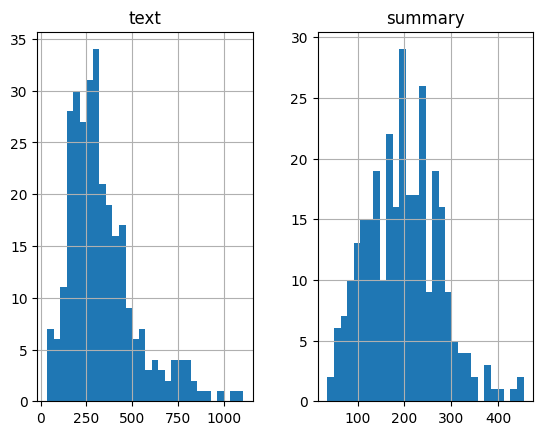

In [ ]:
import matplotlib.pyplot as plt

text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in data['cleaned_text']:
      text_word_count.append(len(i.split()))

for i in data['cleaned_summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})

length_df.hist(bins = 30)
plt.show()

In [ ]:
cnt=0
for i in data['cleaned_summary']:
    if(len(i.split()) <= 300):
        cnt=cnt+1
print(cnt/len(data['cleaned_summary']))

0.9233333333333333


In [ ]:
cnt=0
for i in data['cleaned_text']:
    if(len(i.split()) <= 300):
        cnt=cnt+1
print(cnt/len(data['cleaned_text']))

0.5133333333333333


In [ ]:
max_text_len=300
max_summary_len= 300

In [ ]:
cleaned_text =np.array(data['cleaned_text'])
cleaned_summary=np.array(data['cleaned_summary'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
        
df=pd.DataFrame({'text':short_text,'summary':short_summary}) # new dataframe to use

In [ ]:
df['summary'] = df['summary'].apply(lambda x : 'sostok '+ x + ' eostok')
df.head()

,text,summary
0,"trả lời phỏng vấn, bà hillary tuyên bố: “tôi sẽ là ứng viên tổng thống đại diện cho đảng tôi. điều đó đã ngã ngũ rồi, không có gì thay đổi được”.khẳng định của bà hillary được đưa ra khi bà nắm ưu...","sostok cựu ngoại trưởng mỹ clinton nói rằng donald trump là mối đe dọa đến đất nước, nền dân chủ và nền kinh tế nước này.bà cho rằng ứng viên tổng thống đảng cộng hòa là người “vô trách nhiệm, bất..."
1,"lễ tuyên thệ của bà thái diễn ra trước một lá cờ đài loan và chân dung người sáng lập hòn đảo tôn dật tiên.cơ quan ngoại giao đài loan cho biết gần 700 nguyên thủ quốc gia, các nhà ngoại giao và q...","sostok bà thái anh văn, chủ tịch đảng dân tiến, đã giành chiến thắng trong cuộc bầu cử người đứng đầu chính quyền đài loan.thách thức lớn nhất đối với bà sẽ là việc giải quyết mối quan hệ nguội lạ..."
2,"những quan điểm nêu trên được các chuyên gia chia sẻ tại hội thảo “tp hcm khát vọng vươn lên” báo tuổi trẻ tổ chức ngày 19/5.theo pgs. ts trần đình thiên viện trưởng viện kinh tế việt nam, tp hcm ...","sostok ngày 19-5, tại hội thảo “tp.hcm khát vọng vươn lên”, nhiều chuyên gia đã chỉ ra những nguyên nhân cản trở sự vươn lên của tp.hcm, đồng thời đưa ra nhiều giải pháp để tp bứt phá, vươn lên, t..."
3,"chị lan chết trong tư thế bị trói, ngoài cửa căn nhà tập thể là xác người chồng gục trên vũng máu. tại hiện trường có dấu hiệu của một vụ nổ.căn cứ dấu vết hiện trường, hiện có giả thuyết cho rằng...","sostok 19.5, người dân thị trấn thanh sơn phát hiện cặp vợ chồng tử vong bất thường tại địa phương.danh tính nạn nhân được xác định là anh đỗ viết t. và chị vũ thị l. quê huyện thiệu hóa, thanh hó..."
4,"khoảng 16h ngày 19/5, anh phạm đức huy trong lúc hàn thùng xe tô tải mang bks: 47c-114.26, không may bị điện giật dẫn đến tử vong.theo thông tin ban đầu, trước đó khoảng tiếng, anh huy đến nhà của...","sostok cơ quan csđt tp. buôn ma thuột đang tiến hành điều tra nguyên nhân dẫn đến cái chết của anh phạm đức huy .ngày 19/5, anh huy điều khiển xe tải đến gara phường tân thành để sửa chữa.phát hiệ..."


In [ ]:
from sklearn.model_selection import train_test_split

x_tr,x_val,y_tr,y_val=train_test_split(np.array(df['text']), np.array(df['summary']),
                                       test_size=0.1, random_state=0, shuffle=True) 

# A tokenizer builds the vocabulary and converts a word sequence to an integer sequence.
# We will now build tokenizers for text and summary.

x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_tr))

In [ ]:
thresh=4

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:", (cnt/tot_cnt)*100)
print("Total Coverage of rare words:", (freq/tot_freq)*100)

% of rare words in vocabulary: 60.94808126410835
Total Coverage of rare words: 9.911862961120194


In [ ]:
print(cnt),print(tot_cnt)

1890
3101


(None, None)

In [ ]:
# prepare a tokenizer for reviews on training data

x_tokenizer = Tokenizer(num_words=tot_cnt-cnt) # num_words: the maximum number of words to keep, based on word frequency.
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

#size of vocabulary ( +1 for padding token)
x_voc   =  x_tokenizer.num_words + 1

In [ ]:
x_voc

1212

In [ ]:
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_tr))

In [ ]:
thresh=6

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 71.0809871393813
Total Coverage of rare words: 15.790132732281492


In [ ]:
print(cnt),print(tot_cnt)

2045
2877


(None, None)

In [ ]:
print(freq),print(tot_freq)

3783
23958


(None, None)

In [ ]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_tr))

#convert text sequences into integer sequences
y_tr_seq    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

#size of vocabulary
y_voc  =   y_tokenizer.num_words +1

#deleting the rows that contain only START and END tokens

In [ ]:
ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_tr,ind, axis=0)
x_tr=np.delete(x_tr,ind, axis=0)

In [ ]:
ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)

In [ ]:
from tensorflow.keras.layers import Attention

In [ ]:
latent_dim = 300
embedding_dim=100

# Encoder
encoder_inputs = Input(shape=(max_text_len,))

#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

# Attention layer
attn_layer = Attention(name='attention_layer')
attn_out= attn_layer([encoder_outputs, decoder_outputs])

# Concat attention input and decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)

# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 300, 100)     121200      ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 300, 300),   481200      ['embedding[0][0]']              
                                 (None, 300),                                                     
                                 (None, 300)]                                                     
                                                                                              

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

In [ ]:
print(es)

In [ ]:
print([x_tr, y_tr[:,:-1]])

[array([[ 194,  483,   55, ...,    0,    0,    0],
       [ 605,  645,   55, ...,    0,    0,    0],
       [1053, 1054,  841, ...,    0,    0,    0],
       ...,
       [ 605,  560,  290, ...,    0,    0,    0],
       [  20,  158,  148, ...,    0,    0,    0],
       [  13,   31,  212, ...,    0,    0,    0]], dtype=int32), array([[ 15, 254, 615, ...,   0,   0,   0],
       [ 15, 468, 573, ...,   0,   0,   0],
       [ 15, 621, 119, ...,   0,   0,   0],
       ...,
       [ 15,  19, 529, ...,   0,   0,   0],
       [ 15,  39,  47, ...,   0,   0,   0],
       [ 15,   9,  31, ...,   0,   0,   0]], dtype=int32)]


In [ ]:
print(x_tr[2].shape)

(300,)


In [ ]:
y_tr.shape[0]

133

In [ ]:
print(y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)[:,1:].shape)

(133, 299, 1)


In [ ]:
print(x_tr.shape)

(133, 300)


In [ ]:
print(y_tr.shape)

(133, 300)


In [ ]:
print(y_tr[:,:-1].shape)

(133, 299)


In [ ]:
print(y_tr.reshape(y_tr.shape[0], y_tr.shape[1],1).shape)

(133, 300, 1)


In [ ]:
history=model.fit([x_tr,y_tr], 
                  y_tr,
                  epochs=50,
                  callbacks=[es],
                  batch_size=128, 
                  validation_data=([x_val,y_val], y_val)
                 )

Epoch 1/50
2/2 [==============================] - 86s 19s/step - loss: 6.7234 - val_loss: 6.4304
Epoch 2/50
2/2 [==============================] - 68s 18s/step - loss: 6.4193 - val_loss: 3.6641
Epoch 3/50
2/2 [==============================] - 58s 18s/step - loss: 4.4029 - val_loss: 3.3390
Epoch 4/50
2/2 [==============================] - 60s 17s/step - loss: 3.8966 - val_loss: 3.2948
Epoch 5/50
2/2 [==============================] - 60s 18s/step - loss: 3.8630 - val_loss: 3.3962
Epoch 6/50
2/2 [==============================] - 60s 17s/step - loss: 3.9168 - val_loss: 3.3915
Epoch 6: early stopping


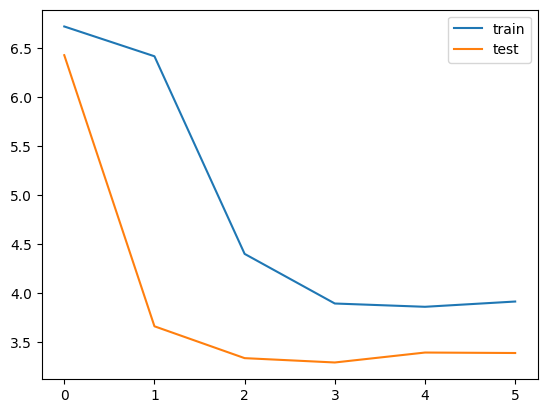

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

In [ ]:
# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_out_inf= attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat) 

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    print("end")
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    # Populate the first word of target sequence with the start word.
    target_seq[0,0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        print("start0")
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        print("start")
        # Sample a token
        print(output_tokens[0, -1, :].shape)
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        print("start2")
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c
        print("end2")
    return decoded_sentence

In [ ]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [ ]:
print(x_tr[1].shape)

(300,)


In [ ]:
print(np.array([x_tr,y_tr]).shape)

(2, 133, 300)


In [ ]:
print("Input shape:", x_tr[1].shape)
print("Target shape:", y_tr[1].shape)


Input shape: (300,)
Target shape: (300,)


In [ ]:
for i in range(0, 10,10):
    print("Review:",seq2text(x_tr[i]))
    print("Original summary:",seq2summary(y_tr[i]))
    test = x_tr[i].reshape(1,max_text_len)
    test = np.tile(test, (max_text_len,1))
    print(test.shape)
    print("Predicted summary:",decode_sequence(test))
    print("\n")

Review: chiều 28 5 lê văn công đến uống cà phê tại quán trên đường lý tự trọng lúc sau khi nữ nhân viên hoàng thị ngọc đi ra thì công bất ngờ lao đến dao khống chế kẻ này hét lớn yêu cầu được gặp ông chủ tập đoàn cà phê của quán hoặc người có trách nhiệm để việc đánh chất của mình cùng lúc anh ta đổ nhiều máy pha cà phê tại quán công phường cảnh sát hình sự và cảnh sát được huy động đến phục nam thanh niên thả con tin sau hơn 15 phút tiếp lợi dụng lúc anh ta sơ cảnh sát đã vào khống chế công giải thoát toàn cho nữ nhân viên theo nhân viên tại quán chiều hôm trước công mang theo một số đồ đến uống cà phê và hỏi số điện thoại của ông chủ tịch tập đoàn cà phê nghe các nhân viên bảo không có số anh ta sang khách đối diện thuê nghỉ theo cán bộ điều tra lúc bị bắt công có biểu hiện bị đá nói rất nhiều 
Original summary: chiều 28 5 công an tp buôn ma thuột triển khai bắt giữ lê văn công để điều tra làm rõ hành vi dao nữ nhân viên tại cà phê của tập đoàn cà phê trung nguyên thời điểm trên lê v

ValueError: ignored